# Assignment Customer Satisfaction and Sentiment Analysis


## Objective

You are a data analyst of a consulting company that provides customer insight regarding multiple ticketing system, such as JIRA and Zoho Desk. Your team gather surveys to customers regarding their ticketing system's performance. Your role in the team is to gather reports regarding customer satisfaction and sentiment analysis into a single dashboard and present your insight.

Analyze the following metrics and other insight you can find in the dataset:

- Survey response rate
- Customer Satisfaction score (CSAT)
- Customer Effort Score (CES)
- Net Promoter Score (NPS)
- Sentiment Analysis



## Data Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

pd.options.display.max_columns = 999
pd.options.display.float_format = "{:.2f}".format

### Access to Drive

Write where you put the data in google drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

# Where is your data_path
df = pd.read_excel('/content/assignment_ticket_system_review.xlsx')

Mounted at /content/drive/


### Read Data

Read the file **assignment_ticket_system_review.csv**

In [ ]:
# Read Data
df = pd.read_excel('/content/assignment_ticket_system_review.xlsx')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The following is the dictionary for the data, survey is only valid if all of the survey questions and text review is not blank (null):

**General Information**
- id_survey: identifier for each survey
- date_of_survey: date of survey taken
- ticket_system: The name of the ticket system being reviewed (e.g. Zoho Desk)

**Survey Questions**
- overall_rating: The overall satisfaction rating given by the reviewer, ranging from 1 to 5
- customer_service: The satisfaction rating for the customer service provided by the ticket system, ranging from 1 to 5.
- features: The satisfaction rating for the features of the ticket system, ranging from 1 to 5
- value_for_money: The satisfaction rating for the value for money provided by the ticket system, ranging from 1 to 5
- ease_of_use: The rating for how easy the ticket system is to use, ranging from 1 to 5
- likelihood_to_recommend: The likelihood that the reviewer would recommend the ticket system to others, ranging from 1 to 10
- overall_text: The full text of the overall review, providing detailed feedback on the ticket system.


In [3]:
df.shape

(1462, 10)

In [6]:
# Check the type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id_survey                1462 non-null   object        
 1   date_of_survey           1462 non-null   datetime64[ns]
 2   ticket_system            1462 non-null   object        
 3   overall_rating           787 non-null    float64       
 4   customer_service         787 non-null    float64       
 5   features                 787 non-null    float64       
 6   value_for_money          787 non-null    float64       
 7   ease_of_use              787 non-null    float64       
 8   likelihood_to_recommend  787 non-null    float64       
 9   overall_text             787 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 114.3+ KB


In [7]:
df.describe()

,date_of_survey,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend
count,1462,787.00,787.00,787.00,787.00,787.00,787.00
mean,2024-11-22 10:37:15.841313024,4.56,3.37,4.42,4.38,4.47,7.61
min,2024-10-01 00:00:00,1.00,-1.00,1.00,1.00,1.00,-1.00
25%,2024-11-02 06:00:00,4.00,3.00,4.00,4.00,4.00,7.00
50%,2024-11-28 00:00:00,5.00,3.00,5.00,5.00,5.00,8.00
75%,2024-12-14 00:00:00,5.00,4.00,5.00,5.00,5.00,9.00
max,2024-12-30 00:00:00,5.00,5.00,5.00,5.00,5.00,10.00
std,NaN,0.64,1.14,0.72,0.82,0.73,1.72


In [5]:
# Mengecek jumlah nilai yang hilang
missing_values = df.isnull().sum()

# Mengecek jumlah duplikat
duplicates = df.duplicated().sum()

print("Jumlah nilai hilang per kolom:\n", missing_values)
print("\nJumlah baris duplikat:", duplicates)

Jumlah nilai hilang per kolom:
 id_survey                    0
date_of_survey               0
ticket_system                0
overall_rating             675
customer_service           675
features                   675
value_for_money            675
ease_of_use                675
likelihood_to_recommend    675
overall_text               675
dtype: int64

Jumlah baris duplikat: 0


In [8]:
df.head()

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text
0,T_02161,2024-11-20,Zendesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T_00229,2024-10-06,Zendesk,3.00,4.00,3.00,3.00,2.00,6.00,Customer tickets managements
2,T_04527,2024-12-26,Zoho Desk,5.00,5.00,5.00,5.00,5.00,8.00,"After 6 months of using the Zoho desk, we shif..."
3,T_03190,2024-12-08,Zoho Desk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T_00644,2024-10-17,Zendesk,5.00,3.00,4.00,5.00,5.00,6.00,Pros:Zendesk has always been one of the go-to ...


In [9]:
df.describe()

,date_of_survey,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend
count,1462,787.00,787.00,787.00,787.00,787.00,787.00
mean,2024-11-22 10:37:15.841313024,4.56,3.37,4.42,4.38,4.47,7.61
min,2024-10-01 00:00:00,1.00,-1.00,1.00,1.00,1.00,-1.00
25%,2024-11-02 06:00:00,4.00,3.00,4.00,4.00,4.00,7.00
50%,2024-11-28 00:00:00,5.00,3.00,5.00,5.00,5.00,8.00
75%,2024-12-14 00:00:00,5.00,4.00,5.00,5.00,5.00,9.00
max,2024-12-30 00:00:00,5.00,5.00,5.00,5.00,5.00,10.00
std,NaN,0.64,1.14,0.72,0.82,0.73,1.72


### Data Cleansing

Convert the date column into proper date_time format.

In [10]:
# Convert data type
# Hapus baris yang tidak memiliki both overall_rating dan overall_text
df_cleaned = df.dropna(subset=['overall_rating', 'overall_text'], how='all').copy()

# Kolom date_of_survey seharusnya sudah dalam format datetime, tapi kita pastikan:
df_cleaned.loc[:, 'date_of_survey'] = pd.to_datetime(df_cleaned['date_of_survey'], errors='coerce')

In [11]:
# Tidak perlu hapus duplikat karena id_survey sudah unik, tapi bisa dicek:
assert df_cleaned['id_survey'].is_unique

# Normalisasi kolom likelihood_to_recommend (jika tidak null)
def normalize_ltr(x):
    return (x / 10) * 4 + 1 if pd.notnull(x) else None

df_cleaned.loc[:, 'likelihood_to_recommend_normalized'] = df_cleaned['likelihood_to_recommend'].apply(normalize_ltr)

# Hasilnya
print("Jumlah data setelah pembersihan:", len(df_cleaned))
print(df_cleaned[['id_survey', 'overall_rating', 'overall_text', 'likelihood_to_recommend', 'likelihood_to_recommend_normalized']].head())

Jumlah data setelah pembersihan: 787
  id_survey  overall_rating  \
1   T_00229            3.00   
2   T_04527            5.00   
4   T_00644            5.00   
6   T_04682            5.00   
8   T_01238            4.00   

                                        overall_text  likelihood_to_recommend  \
1                       Customer tickets managements                     6.00   
2  After 6 months of using the Zoho desk, we shif...                     8.00   
4  Pros:Zendesk has always been one of the go-to ...                     6.00   
6  It has been very useful so far to integrate mu...                     8.00   
8  Pros:It's easy to use and very intuitive.We ha...                     8.00   

   likelihood_to_recommend_normalized  
1                                3.40  
2                                4.20  
4                                3.40  
6                                4.20  
8                                4.20  


## EDA

In [12]:
df.value_counts('ticket_system').reset_index().rename(columns={0:'Count'})

,ticket_system,count
0,Zoho Desk,438
1,Zendesk,435
2,Freshdesk,355
3,Jira Service Management,144
4,ServiceNow,54
5,otrs,36


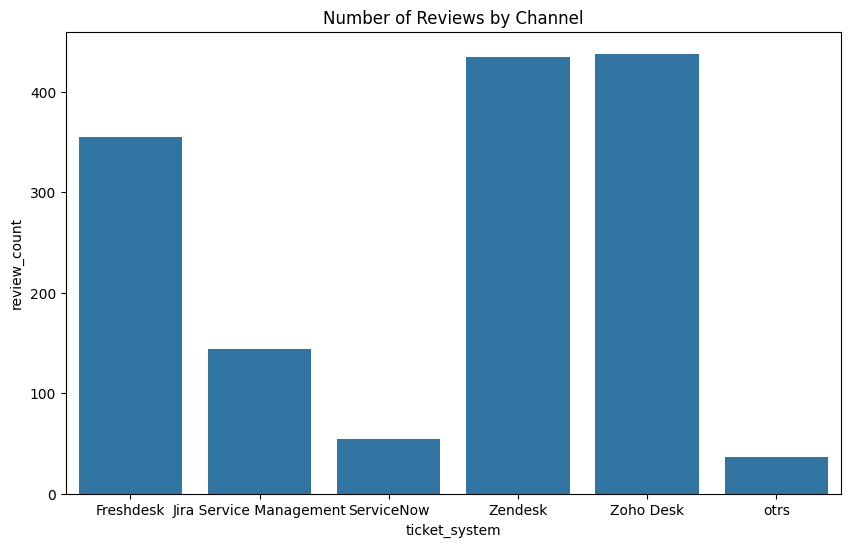

In [ ]:
review_counts = df.groupby('ticket_system')['id_survey'].count().reset_index()
review_counts = review_counts.rename(columns={'id_survey': 'review_count'})

plt.figure(figsize=(10, 6))
sns.barplot(
    x='ticket_system',
    y='review_count',
    data= review_counts,
)
plt.title('Number of Reviews by Channel')
plt.show()

In [13]:
# Hitung rata-rata metric untuk setiap channel (ticket_system)
df.groupby('ticket_system')[['overall_rating', 'ease_of_use', 'likelihood_to_recommend']].mean()

,overall_rating,ease_of_use,likelihood_to_recommend
ticket_system,,,
Freshdesk,4.60,4.64,7.88
Jira Service Management,4.59,4.39,7.61
ServiceNow,4.52,4.22,7.63
Zendesk,4.54,4.40,7.42
Zoho Desk,4.54,4.47,7.56
otrs,4.56,4.33,7.78


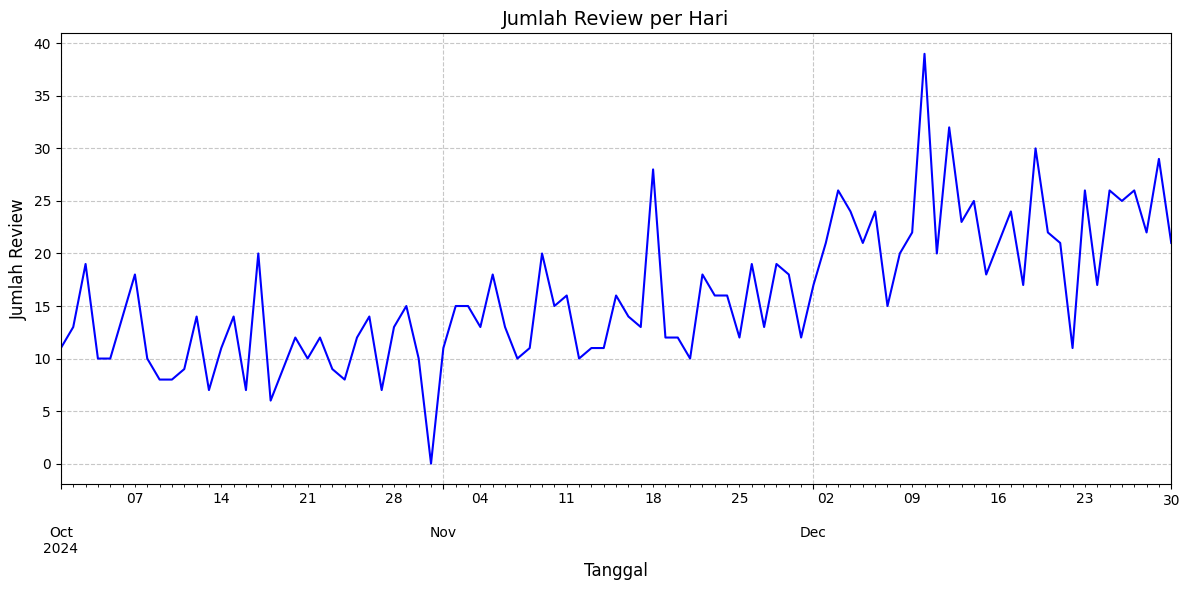

In [ ]:
df.set_index('date_of_survey', inplace=True)

# Hitung jumlah review per hari
daily_reviews = df['id_survey'].resample('D').count()

# Plot
plt.figure(figsize=(12, 6))
daily_reviews.plot(color='blue', linewidth=1.5)
plt.title('Jumlah Review per Hari', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Review', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-17-530ec54a49a4>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_reviews = df['id_survey'].resample('M').count()


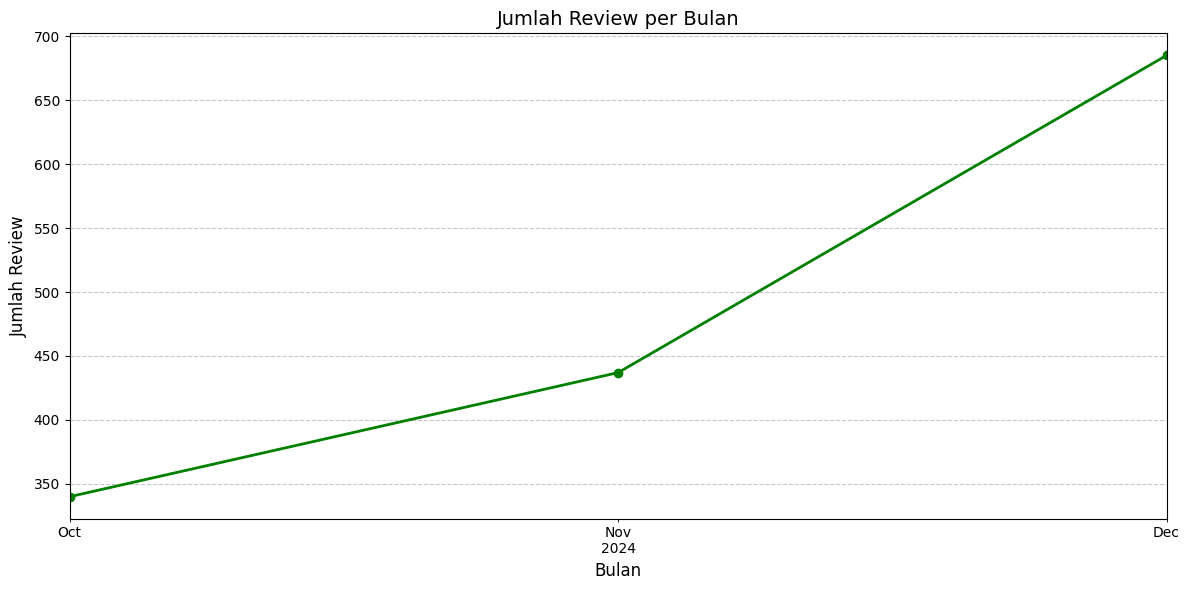

In [ ]:
# Hitung jumlah review per bulan
monthly_reviews = df['id_survey'].resample('M').count()

# Plot
plt.figure(figsize=(12, 6))
monthly_reviews.plot(color='green', marker='o', linewidth=2)
plt.title('Jumlah Review per Bulan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Review', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Survey Analysis

### Response Rate

Start by analyzing how many customers has filled the survey, indicated by whether the overall_rating is not blank.

In [14]:
# How many customer responded to the survey?
df_cleaned['responded'] = df_cleaned['overall_rating'].notnull()
print(df_cleaned['responded'].value_counts())

responded
True    787
Name: count, dtype: int64


Create a new dataframe that consists only of those who have responded the survey to simplify calculating the CSAT, CES, and NPS Score.

In [ ]:
# Responded Customer
df_responded = df_cleaned[df_cleaned['responded'] == True].copy()
df_responded.head()


,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text,likelihood_to_recommend_normalized,responded
1,T_00229,2024-10-06,Zendesk,3.00,4.00,3.00,3.00,2.00,6.00,Customer tickets managements,3.40,True
2,T_04527,2024-12-26,Zoho Desk,5.00,5.00,5.00,5.00,5.00,8.00,"After 6 months of using the Zoho desk, we shif...",4.20,True
4,T_00644,2024-10-17,Zendesk,5.00,3.00,4.00,5.00,5.00,6.00,Pros:Zendesk has always been one of the go-to ...,3.40,True
6,T_04682,2024-12-28,Zoho Desk,5.00,4.00,5.00,5.00,5.00,8.00,It has been very useful so far to integrate mu...,4.20,True
8,T_01238,2024-11-02,Freshdesk,4.00,4.00,4.00,5.00,4.00,8.00,Pros:It's easy to use and very intuitive.We ha...,4.20,True


### CSAT Score

Measure the customer's overall satisfaction score (CSAT) with the following formula:

$$
CSAT = \frac{\Sigma\ total\ satisfaction\ score}{number\ of\ responded\ customer \times \max\ rating}
$$

The max rating is inserted to convert the CSAT score into percentage.

CSAT score can be classified into categories based on the result. There is no absolute threshold for each categories but the following is the common threshold:

- \>= 90%: Excellent
- 75%-90%: Good
- 60-75%: Fair
- \<60%: Poor

In [ ]:
# CSAT Score
# CSAT: Persentase dari overall_rating >= 4
csat_total = df_cleaned['overall_rating'].notna().sum()
csat_positive = df_cleaned[df_cleaned['overall_rating'] >= 4].shape[0]
csat_score = (csat_positive / csat_total) * 100

print(f"CSAT Score: {csat_score:.2f}%")

if csat_score >= 90:
    print("Sangat Baik: Kepuasan pelanggan sangat tinggi.")
elif csat_score >= 75:
    print("Baik: Kepuasan pelanggan umumnya positif.")
elif csat_score >= 60:
    print("Cukup: Kepuasan pelanggan sedang. Ada ruang untuk perbaikan.")
else:
    print("Buruk: Kepuasan pelanggan rendah. Perbaikan yang signifikan diperlukan.")

CSAT Score: 94.41%
Sangat Baik: Kepuasan pelanggan sangat tinggi.


Measure the satisfaction score for the following attributes:

- customer service
- features
- value for money

In [ ]:
# Definisikan fungsi untuk menghitung CSAT
def calculate_csat(series):
    satisfied = series[series >= 4].count()
    total = series.notnull().sum()
    return round((satisfied / total) * 100, 2)

# Hitung CSAT untuk masing-masing atribut
csat_scores = {
    'customer_service': calculate_csat(df_responded['customer_service']),
    'features': calculate_csat(df_responded['features']),
    'value_for_money': calculate_csat(df_responded['value_for_money'])
}

# Tampilkan hasil
for attr, score in csat_scores.items():
    print(f"CSAT for {attr}: {score}%")

CSAT for customer_service: 48.92%
CSAT for features: 90.47%
CSAT for value_for_money: 86.66%


### CES Score

Measure CES with the following formula


$$
CES = \frac{\Sigma\ total\ effort\ score}{number\ of\ responded\ customer \times \max\ rating}
$$

In [ ]:
# CES Score
# CES: Rata-rata dari ease_of_use
ces_score = df_cleaned['ease_of_use'].mean()
print(f"CES Score (avg ease_of_use): {ces_score:.2f} / 5")

if ces_score >= 80:
    print("Excellent: Kemudahan dalam menyelesaikan masalah sangat baik.")
elif ces_score >= 70:
    print("Good: Kemudahan dalam menyelesaikan masalah baik.")
elif ces_score >= 60:
    print("Fair: Kemudahan dalam menyelesaikan masalah cukup. Ada beberapa area yang perlu ditingkatkan.")
else:
    print("Poor: Kemudahan dalam menyelesaikan masalah rendah. Perbaikan signifikan diperlukan.")

CES Score (avg ease_of_use): 4.47 / 5
Poor: Kemudahan dalam menyelesaikan masalah rendah. Perbaikan signifikan diperlukan.


### NPS Score

To calculate the NPS score, first we must convert the **would_you_recommend** column into proper NPS Category based on the rating value:

* Promoter: Rating 9-10
* Passive: Rating 7-8
* Detractor: Rating < 7

In [ ]:
# Category NPS
promoters = df_cleaned[df_cleaned['likelihood_to_recommend'] >= 9]['likelihood_to_recommend'].count()
passives = df_cleaned[(df_cleaned['likelihood_to_recommend'] >= 7) & (df_cleaned['likelihood_to_recommend'] <= 8)]['likelihood_to_recommend'].count() # Access the count for the specific column
detractors = df_cleaned[df_cleaned['likelihood_to_recommend'] <= 6]['likelihood_to_recommend'].count()


Calculate the NPS Score with the following formula

$$
NPS = \frac{Promoter - Detractor}{Total\ Survey\ Responded}
$$

In [ ]:
# NPS Score
nps_score = ((promoters - detractors) / len(df_cleaned)) * 100

print(f"NPS Score: {nps_score:.2f}")
print(f"Promoters: {promoters}, Passives: {passives}, Detractors: {detractors}, Total Responses: {len(df_cleaned)}")

if nps_score >= 70:
    print("Excellent: Sangat baik. Pelanggan sangat setia dan kemungkinan besar akan merekomendasikan produk atau layanan.")
elif nps_score >= 50:
    print("Good: Baik. Pelanggan cukup puas dan mungkin akan merekomendasikan produk atau layanan kepada orang lain.")
elif nps_score >= 0:
    print("Fair: Cukup. Pelanggan memiliki pengalaman yang netral. Perlu ditingkatkan.")
else:
    print("Poor: Buruk. Pelanggan tidak puas dan mungkin tidak akan merekomendasikan produk atau layanan .")

NPS Score: 11.94
Promoters: 251, Passives: 379, Detractors: 157, Total Responses: 787
Fair: Cukup. Pelanggan memiliki pengalaman yang netral. Perlu ditingkatkan.


NPS score can be ranging from -100 (when all customers are detractor) to 100 (when all customers are promoter).

NPS Score can be classified into categories based on the following threshold:

- \>= 70: Excellent
- 50-69: Very Good
- 30-49: Good
- 0-29: Average
- \< 0: Poor

## Sentiment Analysis

Create a new dataframe with no blank overall_text.

In [ ]:
# Dataframe dengan overall_text yang tidak kosong
df_text = df_responded[df_responded['overall_text'].notna() & (df_responded['overall_text'].str.strip() != '')].copy()
df_text.shape  # Lihat berapa data yang tersedia


(787, 12)

In [ ]:
# Create new dataframe
import re
import emoji
import string
import emoji
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
nltk.download('punkt')

alay_dict_url = "https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv"
alay_df = pd.read_csv(alay_dict_url)
alay_dict = dict(zip(alay_df['slang'], alay_df['formal']))

# Buat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Normalisasi
def normalize_text(text):
    return ' '.join([alay_dict.get(word, word) for word in text.split()])

# Fungsi cleaning teks
def clean_text(text):
    text = str(text).lower()  # huruf kecil
    text = emoji.replace_emoji(text, '')  # hapus emoji
    text = re.sub(r'http\S+|www\S+', '', text)  # hapus link
    text = re.sub(r'[^\w\s]', ' ', text)  # hapus tanda baca
    text = re.sub(r'(.)\1{2,}', r'\1', text)  # huruf berulang → 1 huruf
    text = re.sub(r'\s+', ' ', text).strip()  # hapus spasi berlebih
    text = normalize_text(text)  # normalisasi
    text = stemmer.stem(text)  # stemming
    return text

# Gabungkan cleaning dan stemming
def preprocess(text):
    text = clean_text(text)
    text = normalize_text(text)
    text = stemmer.stem(text)
    return text

df_text['cleaned_text'] = df_text['overall_text'].apply(preprocess)
df_text[['overall_text', 'cleaned_text']].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,overall_text,cleaned_text
1,Customer tickets managements,customer tickets managements
2,"After 6 months of using the Zoho desk, we shif...",after 6 months of using the zoho desk we shift...
4,Pros:Zendesk has always been one of the go-to ...,pros zendesk has always been one of the go tap...
6,It has been very useful so far to integrate mu...,itu has been very useful sok far tapi integrat...
8,Pros:It's easy to use and very intuitive.We ha...,pros itu sih easy tapi use and very intuitive ...


In [ ]:
df_text[['overall_text', 'cleaned_text']].tail()

,overall_text,cleaned_text
1457,"IT was not prioritizing, tracking, resolving a...",itu was not prioritizing tracking resolving an...
1458,"Very useful, one-stop solution with related to...",very useful one stop solution with related tap...
1459,We have done quite well. We have already more ...,we have done quite well we have already more t...
1460,"Immensely positive, highly recommended custome...",immensely positive highly recommended customer...
1461,Pros:Easy to start with a basic free setup and...,pros easy tapi start with a basic free setup a...


In [ ]:
! pip install emoji
! pip install Sastrawi
! pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.5 MB/s eta 0:00:00


### Text Cleansing

In order to get more accurate sentiment, several text cleansing need to be done. However, in most of recent sentiment analysis models and algorithm, the only text cleansing needed are as follows:

* Clean double whitespace
* Clean URL/website
* Clean username (mostly in social media or digital text)

In [ ]:
def cleansing_text(x):
  # clean double whitespace
  out_text = ' '.join(x.split())

  # clean url
  out_text = re.sub(r"http\S+|www\S+|https\S+", 'http', out_text)

  # clean username
  out_text = re.sub(r"@\S+", '@user', out_text)

  return(out_text)

cleansing_text(" Doesn't  dissapoint. The car       was great. It was the best car rental experiences I've had! Salute to @jone who recommend https:/rental.com")

"Doesn't dissapoint. The car was great. It was the best car rental experiences I've had! Salute to @user who recommend http"

In [ ]:
# apply cleansing to review
df_text['cleaned_text'] = df_text['overall_text'].apply(cleansing_text)
df_text[['overall_text', 'cleaned_text']].head()

,overall_text,cleaned_text
1,Customer tickets managements,Customer tickets managements
2,"After 6 months of using the Zoho desk, we shif...","After 6 months of using the Zoho desk, we shif..."
4,Pros:Zendesk has always been one of the go-to ...,Pros:Zendesk has always been one of the go-to ...
6,It has been very useful so far to integrate mu...,It has been very useful so far to integrate mu...
8,Pros:It's easy to use and very intuitive.We ha...,Pros:It's easy to use and very intuitive.We ha...


### Sentiment Analysis

Create a sentiment categories using algorithm of your own choice.

In [ ]:
positive_words = [
    'good', 'great', 'excellent', 'amazing', 'easy', 'satisfied', 'fast',
    'recommend', 'friendly', 'best', 'happy', 'helpful', 'awesome', 'positive', 'love'
]

negative_words = [
    'bad', 'slow', 'difficult', 'poor', 'disappointed', 'complicated',
    'terrible', 'unsatisfied', 'angry', 'upset', 'worst', 'hate', 'negative', 'problem'
]


## lexicon-based

In [ ]:
# Sentiment Algorithm
def get_sentiment(text):
    words = text.split()
    pos = sum(word in positive_words for word in words)
    neg = sum(word in negative_words for word in words)

    for i in range(1, len(words)):
        if words[i-1] == 'not':
            if words[i] in positive_words:
                pos -= 1
                neg += 1
            elif words[i] in negative_words:
                neg -= 1
                pos += 1

    if pos > neg:
        return 'Positif'
    elif neg > pos:
        return 'Negatif'
    else:
        return 'Netral'



Check the number of data by sentiment.

In [ ]:
# Number of Sentiment
df_text['sentiment'] = df_text['cleaned_text'].apply(get_sentiment)

# Cek jumlah data berdasarkan sentimen
df_text['sentiment'].value_counts()


,count
sentiment,
Positif,420
Netral,349
Negatif,18


## Finalize Data for Reporting

Save the review data with NPS category and sentiment information to new csv for the dashboard.

In [ ]:
# Save Data
# Menambahkan kategori NPS ke dalam dataframe:
def categorize_nps(score):
    if pd.isna(score):
        return None
    elif score >= 9:
        return 'Promoter'
    elif score >= 7:
        return 'Passive'
    else:
        return 'Detractor'

df_text = df_text.copy()

# Gabungkan kembali data `likelihood_to_recommend` dan hasil kategorinya
df_text['likelihood_to_recommend'] = df_cleaned['likelihood_to_recommend']
df_text['nps_category'] = df_text['likelihood_to_recommend'].apply(categorize_nps)

# Pilih kolom yang ingin disimpan
final_df = df_text[['id_survey','date_of_survey', 'ticket_system', 'customer_service', 'value_for_money',	'ease_of_use', 'overall_text', 'cleaned_text', 'likelihood_to_recommend', 'nps_category', 'sentiment']]

# Simpan ke CSV
final_df.to_csv('final_sentiment_nps_review.csv', index=False)

print("✅ Data berhasil disimpan sebagai 'final_sentiment_nps_review.csv'")



✅ Data berhasil disimpan sebagai 'final_sentiment_nps_review.csv'


In [ ]:
def categorize_nps(score):
    if pd.isna(score):
        return None
    elif score >= 9:
        return 'Promoter'
    elif score >= 7:
        return 'Passive'
    else:
        return 'Detractor'

def categorize_csat(rating):
    if pd.isna(rating):
        return None
    elif rating >= 4:
        return 'Satisfied'
    elif rating >= 3:
        return 'Neutral'
    else:
        return 'Dissatisfied'

# Gabungkan kembali kolom dari df_cleaned ke df_text
df_text = df_text.copy()
df_text['likelihood_to_recommend'] = df_cleaned['likelihood_to_recommend']
df_text['ease_of_use'] = df_cleaned['ease_of_use']
df_text['overall_rating'] = df_cleaned['overall_rating']

# Hitung kolom kategori NPS dan CSAT
df_text['nps_category'] = df_text['likelihood_to_recommend'].apply(categorize_nps)
df_text['csat_category'] = df_text['overall_rating'].apply(categorize_csat)

# Simpan kolom yang relevan untuk dashboard
final_df = df_text[['id_survey','date_of_survey', 'ticket_system',
                    'customer_service', 'value_for_money',
                    'overall_text', 'cleaned_text', 'sentiment',
                    'likelihood_to_recommend', 'nps_category',
                    'ease_of_use', 'overall_rating', 'csat_category']]

# Simpan ke CSV
final_df.to_csv('final_review_sentiment_nps_ces_csat.csv', index=False)

print("✅ Data berhasil disimpan sebagai 'final_review_sentiment_nps_ces_csat.csv'")


✅ Data berhasil disimpan sebagai 'final_review_sentiment_nps_ces_csat.csv'
